Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name, email and UFID.
Please do not modify instruction cells or any cells with automated tests (marked with `[ASSERTS]`). Note: you can add new cells if you need them, but answers must be in the cells with `YOUR CODE HERE` or "YOUR ANSWER HERE" comments.

---

# Homework 1: Basic Practice

## Preamble: Write your Name, Email and UFID

In [40]:
NAME = 'Yash Hegde'
EMAIL = 'yash.hegde@ufl.edu'
UFID = 29402268

print('Homework 1 -- name: {}, email: {}, UFID: {}\n'.format(NAME, EMAIL, UFID))

Homework 1 -- name: Yash Hegde, email: yash.hegde@ufl.edu, UFID: 29402268



In [41]:
""" [ASSERTS] Check that your name, email, and UFID is filled in."""
assert NAME != '' and NAME != 'Your name here.' and len(NAME) > 3
assert EMAIL != '' and EMAIL != 'Your email here.' and len(EMAIL) > 7
assert type(UFID) == int and UFID != 12345678 and UFID >= 10000000 and UFID <= 99999999

## Academic Integrity

### <span style="color:red;">This is an individual assignment. Academic integrity violations (i.e., cheating, plagiarism) will be reported to SCCR!</span><br/>
#### The official CISE policy recommended for such offenses is a course grade of E. Additional sanctions may be imposed by SCCR such as marks on your permanent educational transcripts, dismissal or expulsion.
#### Reminder of the Honor Pledge: On all work submitted for credit by Students at the University of Florida, the following pledge is either required or implied: *"On my honor, I have neither given nor received unauthorized aid in doing this assignment."*

#### Acknowledgement: Do you acknowledge and understand the academic integrity warning above? 

In [42]:
academic_integrity_acknowledgement = True

In [43]:
""" [ASSERTS] Check that you acknowledge the academic integrity warning, you understand it and have been reminded of the UF Honor Pledge."""
assert academic_integrity_acknowledgement

---
# [Task 1] (25 points) Loading and preprocessing.

### [Task 1] We will use the diabetes dataset including in sklearn. In this task you will load the data and preprocess it.

#### The following cell's code (import statements etc.) is provided for you and you should not need to change it.

In [44]:
# Load packages we need
import sys
import os
import time

import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

# Let's check our software versions
print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

def var_exists(var_name):
    return (var_name in globals() or var_name in locals())

------------
### Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
### NumPy version: 1.22.4
### Scikit-learn version: 1.3.2
------------


#### This is the seed we will use, do not change it.

In [45]:
# set the seed
seed = 42
np.random.seed(seed)

In [46]:
""" [ASSERTS] Check seed. """
assert seed == 42

## [Task 1a] (10 points) Load the 'diabetes' dataset. Extract the feature names into 'feature_names', let 'target_name' be 'target' and create a list of all column names 'col_names' to include both the feature names and the target name. Finally, grab the feature matrix in 'all_x' and target vector in 'all_y'.

In [47]:
"""Put your code to load the dataset here.
"""
from sklearn import datasets
from sklearn.utils import Bunch

#load the diabetes dataset (no params)
diabetes = sklearn.datasets.load_diabetes()

#feature_names
feature_names = list(diabetes.feature_names)

#target_name be 'target'
target_name = 'target'

#list of col names 'col_names' -> includes both feature names and target name
col_names = feature_names + [target_name]

#feature matrix all_x
all_x = diabetes.data

#target vector all_y
all_y = diabetes.target

print('Loaded diabetes data: {} rows and {} features.'.format(all_x.shape[0], all_x.shape[1]))
print('Column names: {}.'.format(col_names))

Loaded diabetes data: 442 rows and 10 features.
Column names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target'].


In [48]:
""" [ASSERTS] Check dataset was loaded and task 1a completed. """

assert var_exists('diabetes') and type(diabetes) == sklearn.utils._bunch.Bunch
assert var_exists('feature_names') and type(feature_names) == list
assert var_exists('target_name')
assert var_exists('col_names') and len(col_names) == 11
assert var_exists('all_x') and var_exists('all_y')
assert all_x.shape == (442,10) and all_y.shape == (442,)


## [Task 1b] (5 points) Rescaling features and target. The dataset's features have been mean centered and scaled so the column sum of squares add up to 1. We don't like this so you will rescale each of the features to lie in [0, 1] assuming that each value currently lies in the range [-0.2, 0.2] (clamping any value that falls outside [0,1]). You will store the rescaled feature matrix in 'all_x_rescaled'. 
## You will then binarize the target vector such that any value less than 140 is labeled 0 and any other value greater is labeled 1 and store the result in 'all_y_threshold'. Finally ensure that the dtype of 'all_y_threshold' is int. (Note: this step creates for us a binary classification task, even though this dataset is more commonly used for regression.)

In [49]:
"""Put your code here to rescale the features and binarize the target.
"""
assumed_min_val_x = -0.2
assumed_max_val_x = +0.2

threshold_y = 140.0

#rescaled feature matrix that clamps any value that falls outside [0,1]. (Each value currently lies in range [-0.2, 0.2])
old_range = assumed_max_val_x - assumed_min_val_x
all_x_rescaled = (all_x - assumed_min_val_x) / old_range
all_x_rescaled = np.clip(all_x_rescaled, 0, 1)

#binarized target vector such that val < 140 is =0 and any other value greater is labeled 1. dtype is int
t = all_y - 140
t = np.where(t > 0, 1, 0)
all_y_threshold = t.astype(int)

In [50]:
""" [ASSERTS] Check rescaling for task 1b. """
assert var_exists('all_x_rescaled') and all_x_rescaled.shape == all_x.shape
assert var_exists('all_y_threshold') and all_y_threshold.shape == all_y.shape
assert all_y_threshold.dtype == int


## [Task 1c] (5 points) Now split the data into (train, val, test) with (0.6, 0.2, 0.2) proportions using 'train_test_split' from sklearn (hint: you will have to invoke the function twice). Make sure you use the seed so that the split is reproducible. Store the results into 'train_x', 'train_y', 'val_x', 'val_y', 'test_x', 'test_y'.

In [51]:
"""Put your code here for the train, val, test split.
"""
from sklearn.model_selection import train_test_split

#split data into (train, val, test) w/ (0.6, 0.2, 0.2) proportions (use seed so that split is reproducible)

#we first split up 60% and 40% by assigning the 40% to temp_x and temp_y within the parameter.
train_x, temp_x, train_y, temp_y = train_test_split(all_x_rescaled, all_y_threshold, test_size = 0.4, random_state = seed)

#next we divide the 40% evenly among the validation and test. 
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size = 0.5, random_state = seed)

In [52]:
""" [ASSERTS] Check split for task 1c. """
assert var_exists('train_x') and var_exists('train_y') and train_x.shape[0] == train_y.shape[0]
assert var_exists('val_x') and var_exists('val_y') and val_x.shape[0] == val_y.shape[0]
assert var_exists('test_x') and var_exists('test_y') and test_x.shape[0] == test_y.shape[0]
assert train_x.shape == (265, 10) or train_x.shape == (264, 10)  or train_x.shape == (266, 10) 
assert val_x.shape == (88, 10) or val_x.shape == (89, 10) or val_x.shape == (87, 10) 
assert test_x.shape == (88, 10) or test_x.shape == (89, 10) or test_x.shape == (87, 10) 


## [Task 1d] (5 points) Is the (preprocessed) dataset balanced or not? Justify your answer. Use the training set to answer.

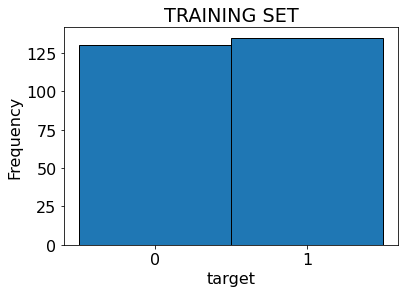

In [53]:
"""Put your code here for task 1d. Then answer the question (write your answer in a comment in the space provided).
"""
#CHECK THIS

bins = np.arange(-1, 2) + 0.5

plt.hist(train_y, bins, density = False, alpha = 1, edgecolor = 'k', label = col_names[-1])
plt.xticks(np.arange(2))
plt.xlabel(col_names[-1])
plt.title('TRAINING SET')
plt.ylabel('Frequency')
plt.show()

## Answer: The (preprocessed) dataset is balanced, because the number of instances of 0 and 1 in this binary classification problem are approximately equal. Thus, there are almost the same amount of instances for each classification in the 'target' of the training set. This proves that the dataset is balanced.

---
# [Task 2] (25 points) Exploring the data. In this task we will look at the data, specifically correlations in the data and think about potentially redundant or useless features.

## [Task 2a] (5 points) To look at the data should we use the training set, the validation set, the test set or all of the data? Justify your answer.

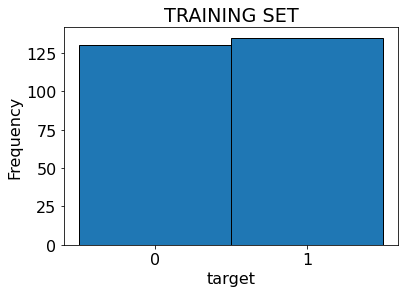

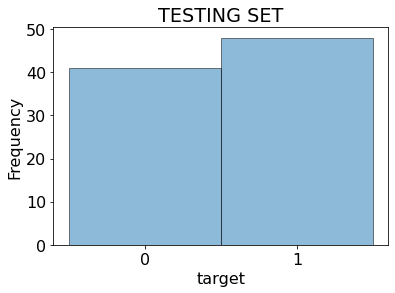

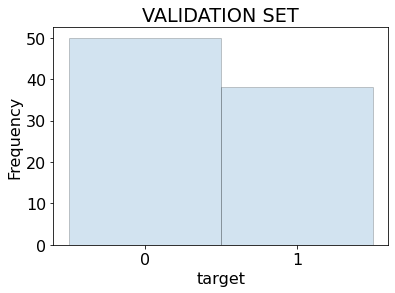

In [54]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# GO OVER THIS
## Answer: To look at the data, we should use the training set, as it tends to highlight the trends in the data, in which we could gain insights into how the data is structured. The other two tend not to be viable options, because the validation set is used to tune the model parameters and to perform model selection. Also, the testing set can only be used when the model is fully trained and can't be viewed individually either, as it is impossible to glean information from this. The training data would be directly applicable to the model.
bins = np.arange(-1, 2) + 0.5

plt.hist(train_y, bins, density = False, alpha = 1, edgecolor = 'k', label = col_names[-1])
plt.xticks(np.arange(2))
plt.xlabel(col_names[-1])
plt.title('TRAINING SET')
plt.ylabel('Frequency')
plt.show()

bins = np.arange(-1, 2) + 0.5

plt.hist(test_y, bins, density = False, alpha = 0.5, edgecolor = 'k', label = col_names[-1])
plt.xticks(np.arange(2))
plt.xlabel(col_names[-1])
plt.title('TESTING SET')
plt.ylabel('Frequency')
plt.show()

bins = np.arange(-1, 2) + 0.5

plt.hist(val_y, bins, density = False, alpha = 0.2, edgecolor = 'k', label = col_names[-1])
plt.xticks(np.arange(2))
plt.xlabel(col_names[-1])
plt.ylabel('Frequency')
plt.title('VALIDATION SET')
plt.show()

## [Task 2b] (10 points) Create a visualization of the training data correlations. You can do a heatmap like we did in exercise 1, you can use pandas and plot a scatter matrix, or you can do it manually. But your code must be self-contained and fit in the cell below and it must show/quantify the correlations between any pairs of features or any feature and the target.

In [55]:
def heatmap(map_data, row_labels, col_labels, title=None, rot=45, fsz=None, 
                show_values=False, colorbar=True, cmap='magma'):
    # see: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

    plt.rcParams.update({'font.size': 18})

    if fsz is not None:
        fig, ax = plt.subplots(figsize=fsz)
    else:
        fig, ax = plt.subplots()
    im = ax.imshow(map_data, cmap=cmap)

    assert len(row_labels) == map_data.shape[0]
    assert len(col_labels) == map_data.shape[1]

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(row_labels)))
    ax.set_yticks(np.arange(len(col_labels)))

    # ... and label them with the respective list entries
    ax.set_xticklabels(row_labels)
    ax.set_yticklabels(col_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=rot, ha="right",
             rotation_mode="anchor")

    if show_values:
        # Loop over data dimensions and create text annotations.
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if i != j:
                    text = ax.text(j, i, '{:.2f}'.format(map_data[i,j]),
                               ha="center", va="center", color="w")

    if title is not None:
        ax.set_title(title)

    if colorbar:
        fig.colorbar(im)

    fig.tight_layout()
    plt.show()

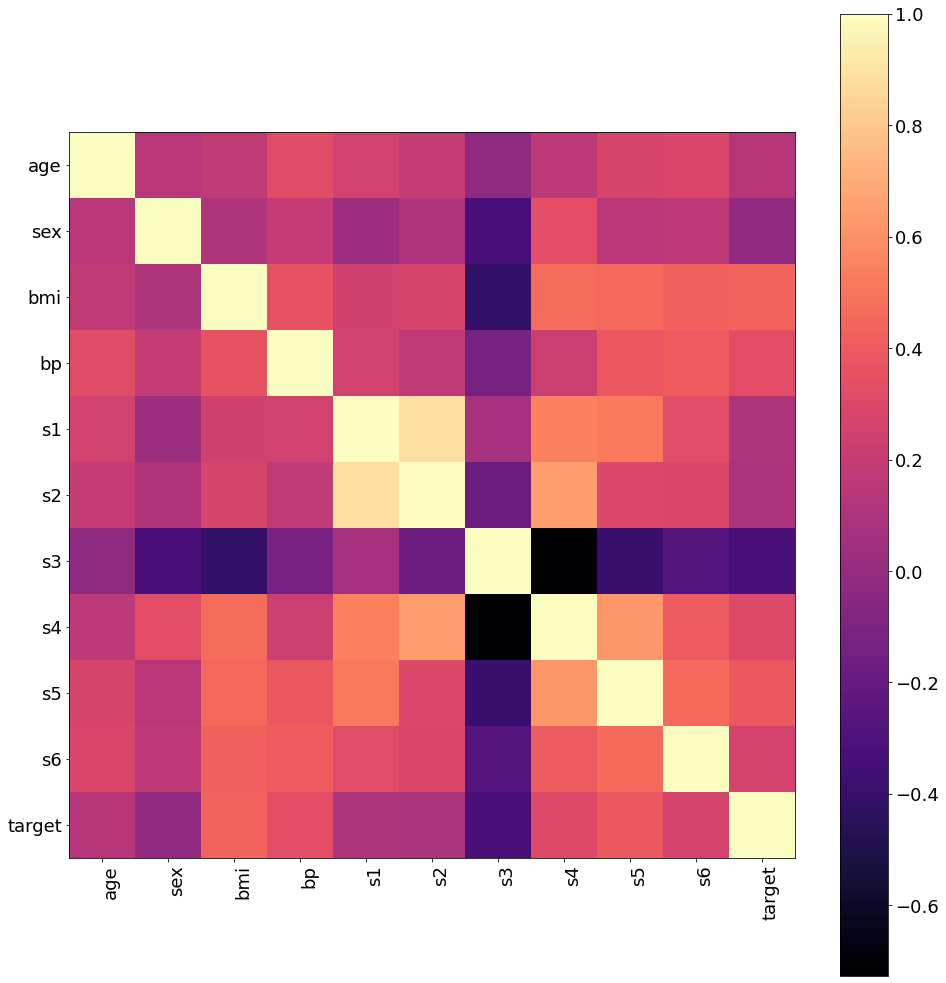

In [57]:
"""Put your code here for task 2b. The code must be self-contained to this cell.
"""
#GO OVER THIS
# YOUR CODE HERE
train_xy = np.hstack((train_x, train_y.reshape(-1, 1)))

pairwise_corr = np.corrcoef(train_xy, rowvar=False)

heatmap(pairwise_corr, col_names, col_names, rot=90, fsz=(14, 14))

In [58]:
""" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"""
# THIS CODE CELL IS INTENTIONALLY LEFT EMPTY --- DO NOT MODIFY THIS CELL
# YOUR CODE HERE

" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"

## [Task 2c] (5 points) According to your visualization: what are the four features that are the most informative with respect to the target? 

In [59]:
"""Put any code on this cell that may help you answer task2c or 2d.
"""
#PERHAPS ADD SOMETHING???
# YOUR CODE HERE

'Put any code on this cell that may help you answer task2c or 2d.\n'

In [60]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer: The four features that are the most informative w.r.t. the target are bmi, s5, bp, and s3. This is because these values tend to skew closer to the abs. value one. This shows that they have a high correlation with the target. 
# YOUR CODE HERE

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

## [Task 2d] (5 points) Are there any features that are redundant and that you would consider removing. If so, which ones and why and if not why not?

In [61]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer: The features that are redundant are s1 and s2, as well as s3 and s4. This is because s1 and s2 have a very low negative value that are closer to -1, while s3 and s4 have a very high positive value that are closer to 1. This indicates the similarity between these classifications in the dataset, showcasing their redundancy.
#
# YOUR CODE HERE

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

---
# [Task 3] (25 points) Learning curves and data augmentation. In this task you will train SVM models, plot learnings curves, and try some (simple) data augmentation.

## [Task 3a] (5 points) Fill in the blanks to complete the code of the following two methods which we will use to train and evaluate the accuracy of models in the rest of the homework.

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

"""Fill in the code for 'model_acc' so the function returns the accuracy of the predictions on 'x'. Use 'accuracy_score' from sklearn. ('y' contains the true labels.)
"""
def model_acc(model, x, y):
    pred = model.predict(x)
    return np.sum(pred == y) / y.shape[0]

"""Fill in the code for 'train_and_eval_acc' so the function computes and return the train accuracy ('tr_acc') and the eval accuracy ('eval_acc'). Your code should use 'model_acc'.
"""
def train_and_eval_acc(model_instance, tr_x, tr_y, eval_x, eval_y):
    model = model_instance.fit(tr_x, tr_y) # trains the model
    
    tr_acc = model_acc(model_instance, tr_x, tr_y)
    eval_acc = model_acc(model_instance, eval_x, eval_y)

    return tr_acc, eval_acc

In [63]:
""" [ASSERTS] Check task 3a. """

train_acc, val_acc = train_and_eval_acc(SVC(random_state=seed), train_x, train_y, val_x, val_y)

assert np.abs(train_acc - 0.8) < 0.1
assert np.abs(val_acc - 0.8) < 0.1


### The following is provided code to help you plot learning curves. You should not need to modify it.

In [64]:
def plot_learning_curves(train_szs, accs, model_name):
    fig, ax = plt.subplots(figsize=(12,7))

    assert accs.shape[-1] == 2, 'Must have last dim of size 2 with train acc and val/test acc.'
    assert len(accs.shape) == 2 or len(accs.shape) == 3, 'Invalid input'

    multiple_measurements = len(accs.shape) == 3
    if multiple_measurements:
        std_accs = np.std(accs, axis=0)
        accs = np.mean(accs, axis=0)
    
    plt.plot(train_szs, accs[:,0]*100.0, 'ro-', linewidth=3, label='Training')
    plt.plot(train_szs, accs[:,1]*100.0, 'bs--', linewidth=3, label='Test/Validation')

    if multiple_measurements:
        laccs = accs - std_accs
        uaccs = accs + std_accs
        plt.fill_between(train_szs, laccs[:,0]*100.0, uaccs[:,0]*100.0, color='r', alpha=0.3)
        plt.fill_between(train_szs, laccs[:,1]*100.0, uaccs[:,1]*100.0, color='b', alpha=0.3)

    ax.set_xlim(0, np.max(train_szs))
    ax.set_ylim(54, 104)
    ax.set_xlabel('Number of training examples')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curves for {}'.format(model_name))

    plt.legend()
    plt.show()

## [Task 3b] (5 points) Fill in the code below to plot the learning curves.

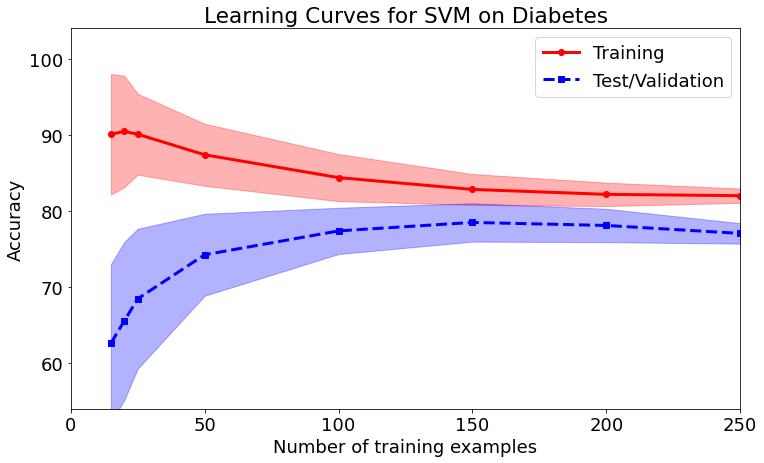

In [65]:
"""Fill in the code for 'get_learning_curve_acc' so the function trains and evaluate a SVC model (default parameters but set the seed) on 'tr_x/y' 
and 'eval_x_/y_' using 'train_and_eval_acc' in each iteration of the loop.
"""
def get_learning_curve_acc(tr_sizes, train_x_, train_y_, eval_x_, eval_y_):
    pi = np.random.permutation(train_x.shape[0])
    shuf_tr_x = train_x_[pi]
    shuf_tr_y = train_y_[pi]
    lc_arr = np.zeros((tr_sizes.shape[0],2))
    
    for i, tr_sz in enumerate(tr_sizes):
        tr_x = shuf_tr_x[0:tr_sz]
        tr_y = shuf_tr_y[0:tr_sz]
        # YOUR CODE HERE
        tr_acc, val_acc = train_and_eval_acc(SVC(random_state=seed), tr_x, tr_y, eval_x_, eval_y_)
        lc_arr[i,:] = [tr_acc, val_acc]
        
    return lc_arr


# the following will compute and plot the learning curves.
tr_sizes = np.array([15, 20, 25, 50, 100, 150, 200, 250,])
num_samples = 100
lc_arrs = None

for i in range(0, num_samples):
    lc_arr = get_learning_curve_acc(tr_sizes, train_x, train_y, val_x, val_y)
    lc_arrs = lc_arr[np.newaxis,:] if lc_arrs is None else np.r_[lc_arrs, lc_arr[np.newaxis,:]]

plot_learning_curves(tr_sizes, lc_arrs, 'SVM on Diabetes')

In [66]:
""" [ASSERTS] Check task 3b. """

assert var_exists('lc_arrs') and lc_arrs.shape == (100, tr_sizes.shape[0], 2)

In [67]:
""" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"""
# THIS CODE CELL IS INTENTIONALLY LEFT EMPTY --- DO NOT MODIFY THIS CELL
# YOUR CODE HERE

" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"

## [Task 3c] (5 points) What can we say about the amount of training data from the learning curve? Would more data improve the model? Justify your answer.

In [68]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# GO BACK TO THIS
## Answer: What we can say about the amount of training data from the learning curve is that it contains a large amount of data that the training data does not account for as the number of training examples increases. This causes a plateau in the data for very high number of training examples. More data would not necessarily improve the model for this very reason. 
#
# YOUR CODE HERE

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

## [Task 3d] (5 points) It's time to try some data augmentation. Fill in the body of the loop. The provided code will add Gaussian noise (mean 0, standard dev sigma) to the training features to augment the dataset. It will then train and evaluate SVM models on the original data and the augmented data for various sigmas.

In [69]:
""" Add gaussian noise with mean 0 and standard deviation sigma to feature matrix x. Returns x and noisy x. """
def add_gaussian_noise(x, y, sigma):
    noisy_x = x + np.random.randn(*x.shape)*sigma
    out_x = np.r_[x, noisy_x]
    out_x = np.clip(out_x, 0.0, 1.0)
    out_y = np.r_[y, y]
    pi = np.random.permutation(out_x.shape[0])
    return out_x[pi,:], out_y[pi]


# first evaluate the model on the original data
train_acc_orig, val_acc_orig = train_and_eval_acc(SVC(random_state=seed), train_x, train_y, val_x, val_y)
print('[Original] Model accuracy --- train: {:.1f}%, val: {:.1f}%\n'.format( 100*train_acc_orig, 100*val_acc_orig))


num_runs = 100
sigmas = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 5.0, 10.0]
for sigma in sigmas:
    aug_accs = np.zeros((num_runs,2))
    for i in range(0, num_runs):
        """ Fill in the body of the loop to use add_gaussian_noise to augment the training data and then train and evaluate an SVC model (default parameters but set the seed). 
        Store the training accuracy in 'train_acc_aug' and the validation accuracy in 'val_acc_aug' """
        # YOUR CODE HERE
        aug_train_x, aug_train_y = add_gaussian_noise(train_x, train_y, sigma)
        train_acc_aug, val_acc_aug = train_and_eval_acc(SVC(random_state=seed), aug_train_x, aug_train_y, val_x, val_y)
        aug_accs[i,:] = [train_acc_aug, val_acc_aug]

    mean_train_acc = np.mean(aug_accs[:, 0])
    mean_val_acc = np.mean(aug_accs[:, 1])

    print('[Augmented sigma={:.2f}] --- train: {:.1f}%, val: {:.1f}%'.format(sigma, 100*mean_train_acc, 100*mean_val_acc))

[Original] Model accuracy --- train: 82.6%, val: 77.3%

[Augmented sigma=0.00] --- train: 83.4%, val: 73.9%
[Augmented sigma=0.01] --- train: 83.6%, val: 74.9%
[Augmented sigma=0.05] --- train: 83.3%, val: 77.5%
[Augmented sigma=0.10] --- train: 81.6%, val: 78.6%
[Augmented sigma=0.20] --- train: 80.8%, val: 79.7%
[Augmented sigma=0.30] --- train: 80.8%, val: 80.1%
[Augmented sigma=0.50] --- train: 80.8%, val: 80.3%
[Augmented sigma=1.00] --- train: 80.3%, val: 81.4%
[Augmented sigma=5.00] --- train: 79.5%, val: 81.8%
[Augmented sigma=10.00] --- train: 79.4%, val: 81.8%


In [70]:
""" [ASSERTS] Check task 3d. """

assert var_exists('aug_accs') and np.amin(aug_accs) > 0.7

## [Task 3e] (5 points) Answer the following questions. (Q1) Is data augmentation effective in this case? Why or why not? (Q2) What do you observe to the train accuracy as sigma increases? Explain why this occurs.

In [71]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer to (Q1): Data augmentation is effective in this case, as the validation accuracy increases tremendously over the course of the epochs. This shows that the augmented sigma allows for the model to account for unforeseen data in the dataset, hence the jump in validation accuracy.
#
## Answer to (Q2): As the sigma increases, the training accuracy decreases. This is due to the fact that the increase in sigma introduces more complexity to the model. This would lead to potential overfitting, decreasing training accuracy.
#
# YOUR CODE HERE

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

---
# [Task 4] (25 points) Naive Bayes. In this task you will train Naive Bayes models and for that you will do some feature engineering.

## [Task 4a] (5 points) Read up on Naive Bayes and answer the following questions in your own words. (Q1) What is the main assumption built into Naive Bayes models? Is this assumption reasonable? Why or why not? (Q2) The sklearn documentation on Naive Bayes (https://scikit-learn.org/stable/modules/naive_bayes.html) states "naive Bayes is known as a decent classifier, it is known to be a bad estimator." What does that mean and why is that? Two or three sentences is fine.

In [72]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer to (Q1): The main assumption built into Naive Bayes models is the assumption that the predictors in the model are mutually exclusive and don't relate to each other at all. They are independent and don't correlate with any other feature in the model. This assumption is not reasonable (although it is effective due to its good performance) due to real world situations having a host of factors being related to each other, no matter how seemingly insignificant.
#
## Answer to (Q2): The statement means that the model can classify data due to its ability to independently gauge different predictors when looking through large datasets. However, this would mean it is a bad estimator since it does not draw any connections between data in the dataset, treating everything as independent. This means that the data cannot accurately make estimations, with potentially dependent variables in the data being surveyed on their own.
#
# YOUR CODE HERE

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

## [Task 4b] (5 points) Fill in the code below to train a GaussianNB classifier (default parameters) on the training set and evaluate it on the validation data.

In [73]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB

""" Fill in the code to train GaussianNB on the training data and evaluate the accuracy on the validation data (use default parameters). 
Store the training accuracy in 'train_acc' and the validation accuracy in 'val_acc' (use 'train_and_eval_acc'). """
# YOUR CODE HERE
gaussianNB = GaussianNB()

# Train the classifier and evaluate its accuracy
train_acc, val_acc = train_and_eval_acc(gaussianNB, train_x, train_y, val_x, val_y)

print('[GaussianNB] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

[GaussianNB] Train acc: 71.7%, Val acc: 76.1%


In [74]:
""" [ASSERTS] Check task 4b. """

assert var_exists('train_acc') and var_exists('val_acc')
assert train_acc > 0.7 and val_acc > 0.7

## [Task 4c] (10 points) Implement real_to_categ() function to transform real features to categorical features.

In [76]:
""" Fill in the code for real_to_categ. The function takes a n-by-m feature matrix 'x' of reals with m features and n examples. 
It return a n-by-m matrix of categorical features 'cat_x' where feature i,j of cat_x is has value integer k if  feature i,j of 'x' falls within the kth bin
according 'bins'. If 'bins' is None then the function first creates 'num_bins' equally-space bins for each feature between the min and max values for that feature.
In addition to 'cat_x' the function returns 'bins' (the created or given bins) which is a m-by-num_bins array of bin edges.

Note: You can implement this however you like, but I recommend staying away from sklearn.preprocessing classes such as OrdinalEncoder as it may not do what you think.
(Hint: you can use numpy.linspace() to create bins and numpy.digitize to determine placement of real feature values in bins.)
"""
def real_to_categ(x, bins=None, num_bins=5):
    assert num_bins > 1
    if bins is not None:
        assert type(bins) == np.ndarray
        assert bins.shape == (x.shape[1],num_bins), 'Invalid bins.'
    else:
        bins = np.empty((x.shape[1], num_bins))
        for i in range(x.shape[1]):
            bins[i, :] = np.linspace(np.min(x[:, i]), np.max(x[:, i]), num_bins)

    cat_x = np.empty_like(x, dtype=int)
    for i in range(x.shape[1]):
        cat_x[:, i] = np.digitize(x[:, i], bins[i, :])
        
    cat_x = np.clip(cat_x, 1, num_bins) # clip so no features falls outside of the bins.
    return cat_x.astype(int), bins

In [77]:
""" [ASSERTS] Check task 4c. """

x = np.c_[(np.arange(1, 10)/10.0), np.flipud(np.arange(0, 9)/10.0)]

cat_x, bins_x = real_to_categ(x)
assert cat_x is not None and bins_x is not None
assert x.shape == cat_x.shape
assert np.amin(cat_x) == 1 and np.amax(cat_x) == 5

correct_bins = np.array([[0.1, 0.3, 0.5, 0.7, 0.9],
                          [0.0, 0.2, 0.4, 0.6, 0.8]])
assert bins_x.shape == correct_bins.shape and np.sum(np.abs(bins_x - correct_bins)) < 1e-8


## [Task 4] The following code will transform the data to categorical use 'real_to_categ' and train and evaluate a CategoricalNB model on it. You do not need to modify it.

In [78]:
# train and evaluate CategoricalNB on the real features.
train_acc, val_acc = train_and_eval_acc(CategoricalNB(), train_x, train_y, val_x, val_y)
print('[CategoricalNB w/ real features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

# transform the features to categorical data using bins learned from train_x.
cat_train_x, bins = real_to_categ(train_x, bins=None)
cat_val_x, _ = real_to_categ(val_x, bins=bins)
cat_test_x, _ = real_to_categ(test_x, bins=bins)

# train and evaluate CategoricalNB on the categorical features.
train_acc, val_acc = train_and_eval_acc(CategoricalNB(), cat_train_x, train_y, cat_val_x, val_y)
print('[CategoricalNB w/ categorical features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

[CategoricalNB w/ real features] Train acc: 50.9%, Val acc: 43.2%
[CategoricalNB w/ categorical features] Train acc: 69.4%, Val acc: 80.7%


## [Task 4d] (5 points) Use the real_to_categ() function to binarize real features so you can then train and evaluate a BernoulliNB model on the binarized data.

In [79]:
""" Fill in the code to binarize the feature matrix so that features x with values below the 67th percentile are mapped to 0 and values above are mapped to 1.
For this you should use 'real_to_categ' with appropriately chosen bins derived from 'train_x' percentiles.
Put the resulting arrays in 'bin_train_x', 'bin_val_x', and 'bin_test_x'. 
Note that the bins must be derived from 'train_x' and then applied to val and test.
"""

# Calculate the 67th percentile of the training data
percentile_67 = np.percentile(train_x, 67)

bins = np.array([0, percentile_67, np.max(train_x)])

# Use real_to_categ to binarize the training, validation, and test data
cat_train_x, bins = real_to_categ(train_x, bins=None)
cat_val_x, _ = real_to_categ(val_x, bins=bins)
cat_test_x, _ = real_to_categ(test_x, bins=bins)
print(cat_train_x)

# Binarize the categorical features
bin_train_x = (cat_train_x > 1).astype(int)
bin_val_x = (cat_val_x > 1).astype(int)
bin_test_x = (cat_test_x > 1).astype(int)
print(bin_train_x)

# train and evaluate BernoulliNB on the real features.
train_acc, val_acc = train_and_eval_acc(BernoulliNB(), train_x, train_y, val_x, val_y)
print('[BernoulliNB w/ real features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

# train and evaluate BernoulliNB on the binary features.
train_acc, val_acc = train_and_eval_acc(BernoulliNB(), bin_train_x, train_y, bin_val_x, val_y)
print('[BernoulliNB w/ binary features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

[[2 1 3 ... 2 3 3]
 [4 1 3 ... 2 4 3]
 [4 5 1 ... 2 3 3]
 ...
 [3 1 2 ... 1 2 3]
 [2 1 1 ... 2 2 2]
 [1 1 2 ... 1 2 3]]
[[1 0 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 0 1 ... 0 1 1]
 [1 0 0 ... 1 1 1]
 [0 0 1 ... 0 1 1]]
[BernoulliNB w/ real features] Train acc: 50.9%, Val acc: 43.2%
[BernoulliNB w/ binary features] Train acc: 69.1%, Val acc: 78.4%


In [80]:
""" [ASSERTS] Check task 4d. """

assert var_exists('bin_train_x') and var_exists('bin_val_x') and var_exists('bin_test_x')
assert np.amin(bin_train_x) == 0 and np.amax(bin_train_x) == 1 and np.array_equal(bin_train_x, bin_train_x.astype(int))
assert train_x.shape == bin_train_x.shape
assert np.amin(bin_val_x) == 0 and np.amax(bin_val_x) == 1 and np.array_equal(bin_val_x, bin_val_x.astype(int))
assert bin_val_x.shape == bin_val_x.shape
assert np.amin(bin_test_x) == 0 and np.amax(bin_test_x) == 1 and np.array_equal(bin_test_x, bin_test_x.astype(int))
assert bin_test_x.shape == bin_test_x.shape


---
# [Task 5] \<*For CAI6108MLE Only*\> (25 points) Hyperparameter search. For this task you will choose two hyperparameters to optimize and you will fill in the code below to optimize them using grid search and train a model with the best hyperparameter values. Other than the two hyperparameter you choose you should only modify the seed and/or the maximum number of iterations (if applicable).
# The type of model you have to use depends on the *last* digit of your UFID:
## + SVC if the last digit is 2, 3, 5, or 7;
## + KNeighborsClassifier if the last digit is 1, 4, or 6; and
## + GaussianNB otherwise (if the last digit is 0, 8 or 9).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

"""Fill in the code for the hyperparameter search. You must choose only two hyperparameters to tune, leave the default value for the rest (except seed/max_iter if applicable).
Your code must return 'best_hyperparams' the best combination of hyperparameters you found and 'best_model' the corresponding trained model.
Your code must run in only a few seconds to enable automatic grading (e.g., less than 30 seconds).
"""
def search_hyperparams_and_train(train_x, train_y, val_x, val_y):
    best_hyperparams = {}
    best_model = None

    print('Searching for hyperparameters (UFID: {})'.format(UFID))

    # YOUR CODE HERE
    raise NotImplementedError()
    return best_model, best_hyperparams

### [Task 5] The following code is provided, you should not modify it.

In [ ]:
st = time.time()
model, hyperparams = search_hyperparams_and_train(train_x, train_y, val_x, val_y)
et = time.time()

elapsed = et - st
print('Elapsed time: {:.1f} seconds [model type: {}, hyperparams: {}]'.format(elapsed, model.__class__.__name__, hyperparams))

train_acc = model_acc(model, train_x, train_y)
val_acc = model_acc(model, val_x, val_y)
test_acc = model_acc(model, test_x, test_y)

print('Train acc: {:.1f}%, val acc: {:.1f}%, test acc: {:.1f}%'.format(100*train_acc, 100*val_acc, 100*test_acc))

In [ ]:
""" [ASSERTS] Check task 5. """

assert var_exists('model')
assert elapsed < 30.0 # less than 30 seconds.
assert np.amin([train_acc, val_acc, test_acc]) > 0.6
